### Student Information
Name: 黃子軒

Student ID: 113062614

GitHub ID: Brady29655751

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [44]:
### Begin Assignment Here
# Import lots of moudules

import helpers.data_mining_helpers as dmh
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from PAMI.frequentPattern.maximal import MaxFPGrowth as mfpg
from PAMI.frequentPattern.basic import FPGrowth as fpg
from PAMI.frequentPattern.topk import FAE as fae
from PAMI.extras.dbStats import TransactionalDatabase as tds
from PAMI.extras.DF2DB import DenseFormatDF as db
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from tqdm import tqdm
import plotly.offline as pof
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import umap
import math

%matplotlib inline

## Instruction 2
#### Follow same process as Master notebook with new dataset.

I implemented all exercises in master notebooks.

In [2]:
# Excercise 1 is skipped by directly read the dataset to dataframe
df = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")
df

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...
...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,....."
1496,not nostalgia,it's sad this is such a beautiful song when yo...
1497,not nostalgia,"Dear Friend, I think age and time is not that ..."
1498,nostalgia,I was born in 1954 and started to be aware of ...


In [59]:
# Exercise 2
df.loc[:10,'sentiment']

# Exercise 3
print(df[df['sentiment'] == 'nostalgia'].iloc[::10][:5])

# Exercise 4
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

    sentiment                                            comment  \
1   nostalgia  The mist beautiful voice ever I listened to hi...   
18  nostalgia  My Grandparents had a pub in the 1970's, this ...   
32  nostalgia  I remember my Mom listening to Jim over and ov...   
50  nostalgia  If I remember correctly, this song came out af...   
71  nostalgia  Gosh does this bring back memories. Nearly eve...   

                                             unigrams  
1   [The, mist, beautiful, voice, ever, I, listene...  
18  [My, Grandparents, had, a, pub, in, the, 1970,...  
32  [I, remember, my, Mom, listening, to, Jim, ove...  
50  [If, I, remember, correctly, ,, this, song, ca...  
71  [Gosh, does, this, bring, back, memories, ., N...  


0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1495    (The amoung of missing records is: , 0)
1496    (The amoung of missing records is: , 0)
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
Length: 1500, dtype: object

<AxesSubplot:title={'center':'Category distribution'}>

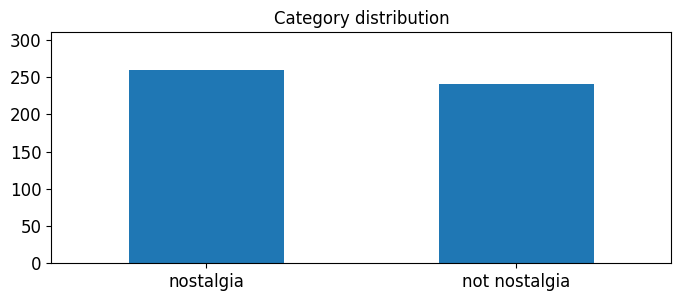

In [31]:
# Exercise 5 and 6 
df_sample = df.sample(n=500)

# Exercise 7 (bar chart)
upper_bound = max(df_sample.sentiment.value_counts() + 50)
df_sample.sentiment.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

<AxesSubplot:title={'center':'Category distribution'}>

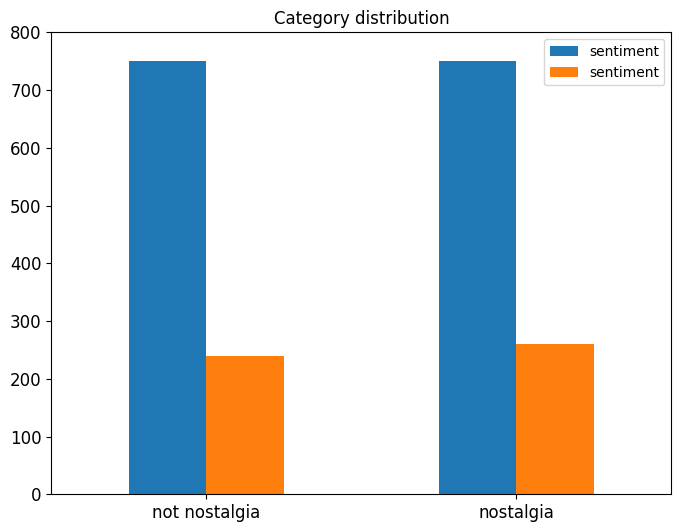

In [32]:
# Exercise 8
df_value = df.sentiment.value_counts()
df_sample_value = df_sample.sentiment.value_counts()

upper_bound = max(df_value + 50)

df_combined_value = pd.concat([df_value, df_sample_value], axis = 1)
df_combined_value.plot(kind = 'bar',
                    title = 'Category distribution',
                    ylim = [0, upper_bound], 
                    rot = 0, fontsize = 12, figsize = (8,6))

In [3]:
# Exercise 9
df['unigrams'] = df['comment'].apply(lambda x: dmh.tokenize_text(x))

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.comment) #learn the vocabulary and return document-term matrix
analyze = count_vect.build_analyzer()
analyze(df.comment[0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

In [42]:
# Exercise 10
df_counts[0:5, 0:100].toarray()
count_vect.get_feature_names_out()[df_counts[0:5, 0:100].toarray().tolist()[3].index(1, 1)]

'1st'

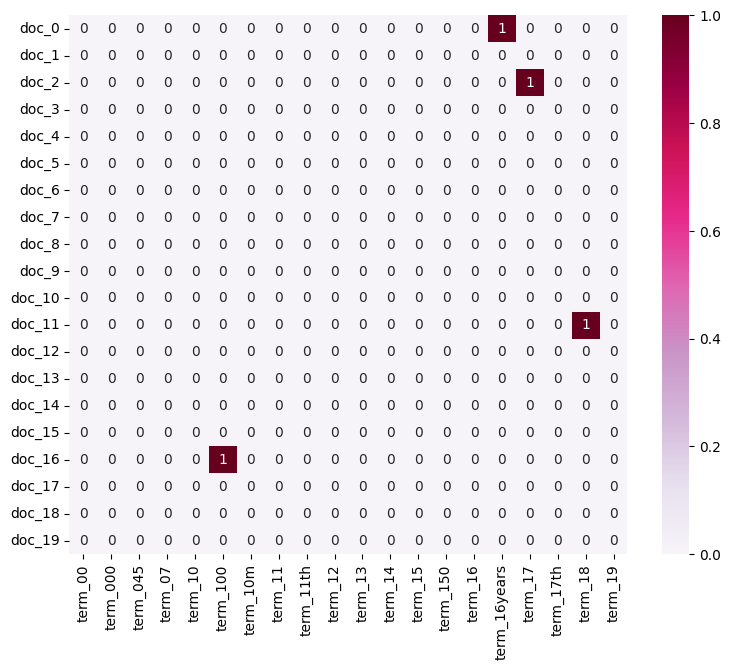

In [43]:
# Exercise 11
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]
plot_z = df_counts[0:20, 0:20].toarray() #df_counts[how many documents, how many terms]

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [48]:
# Exercise 12
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

pof.init_notebook_mode(connected = True)
pof.iplot([{'x': count_vect.get_feature_names_out()[:300], 'y': term_frequencies[:300]}])

In [56]:
# Exercise 13
threshold = 50
frequent = [(i,v) for i,v in enumerate(term_frequencies) if v >= threshold]
feature = [(i, count_vect.get_feature_names_out()[i]) for i,v in frequent]
pof.iplot([{'x': [f[1] for f in feature], 'y': [f[1] for f in frequent]}])

In [57]:
# Exercise 14
frequent.sort(key=lambda x: x[1], reverse=True)
feature = [(i, count_vect.get_feature_names_out()[i]) for i,v in frequent]
pof.iplot([{'x': [f[1] for f in feature], 'y': [f[1] for f in frequent]}])

In [58]:
# Exercise 15
term_frequencies_log = [math.log(i) for i in term_frequencies]
frequent = [(i,v) for i,v in enumerate(term_frequencies_log) if v >= math.log(threshold)]
frequent.sort(key=lambda x: x[1], reverse=True)
feature = [(i, count_vect.get_feature_names_out()[i]) for i,v in frequent]
pof.iplot([{'x': [f[1] for f in feature], 'y': [f[1] for f in frequent]}])

In [11]:
# Exercise 16
sentiments = df['sentiment'].unique() 
sentiment_dfs = {}  # Dictionary to store DataFrames for each

for sentiment in sentiments:
    sentiment_dfs[sentiment] = df[df['sentiment'] == sentiment].copy()

# Function to create term-document frequency DataFrame for each
def create_term_document_df(df):
    count_vect = CountVectorizer()
    df_counts = count_vect.fit_transform(df['comment'])
    words = count_vect.get_feature_names_out()
    term_document_df = pd.DataFrame(df_counts.toarray(), columns=words)
    return term_document_df

# Create term-document frequency DataFrames for each 
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each

for sentiment in sentiments:
    filt_term_document_dfs[sentiment] = create_term_document_df(sentiment_dfs[sentiment])

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    word_sums = term_document_df.sum(axis=0)
    sorted_words = word_sums.sort_values()
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}')
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}')
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for sentiment in sentiments:
    print(f'\nFor sentiment {sentiment} we filter the following words:')
    term_document_dfs[sentiment] = filter_top_bottom_words_by_sum(filt_term_document_dfs[sentiment])

# Example: Display the filtered DataFrame for one of the sentiment
print(f"Filtered Term-Document Frequency DataFrame for Sentiment {sentiments[-1]}:")
term_document_dfs[sentiments[-1]]


For sentiment not nostalgia we filter the following words:
Bottom 1.0% words: 
00               1
montgomery       1
money            1
monday           1
moments          1
mocking          1
mock             1
mitch            1
misunderstood    1
minute           1
minds            1
miller           1
monumental       1
millennium       1
miles            1
microphone       1
miami            1
meta             1
mess             1
merle            1
mendes           1
mended           1
melting          1
melt             1
melodica         1
milestone        1
dtype: int64
Top 5.0% words: 
first       23
classic     23
amazing     24
wish        24
make        25
          ... 
of         361
to         394
and        451
this       453
the        708
Length: 130, dtype: int64

For sentiment nostalgia we filter the following words:
Bottom 1.0% words: 
yup            1
gospel         1
rose           1
round          1
rousing        1
goodness       1
routine        1
row       

,07,10,11,11th,12,13,14,15,16,17,...,yo,yokel,younger,youngster,your,yours,youth,youthful,youtube,yrs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Exercise 17 (part 1)
for sentiment in term_document_dfs:
    # Replace dots with underscores in the name to avoid errors in the file creation
    sentiment_safe = sentiment.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[sentiment])
    obj.convert2TransactionalDatabase(f'td_freq_db_{sentiment_safe}.csv', '>=', 1)

Database size (total no of transactions) : 746
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.402144772117962
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 5.950348241365226
Variance in Transaction Sizes : 35.45416989042229
Sparsity : 0.9965649449010148
Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.213372063492091
Variance in Transaction Sizes : 52.103722524357735
Sparsity : 0.9959733855996001


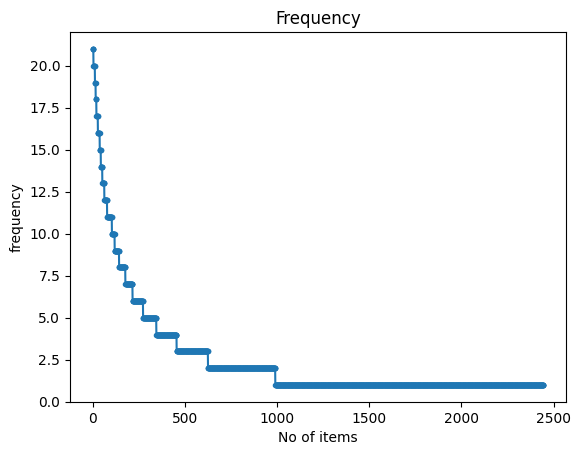

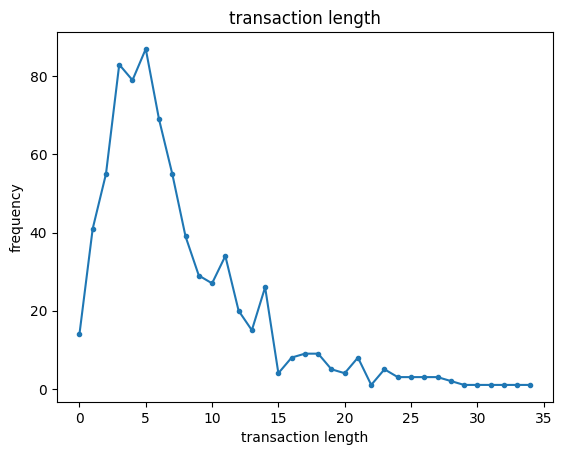

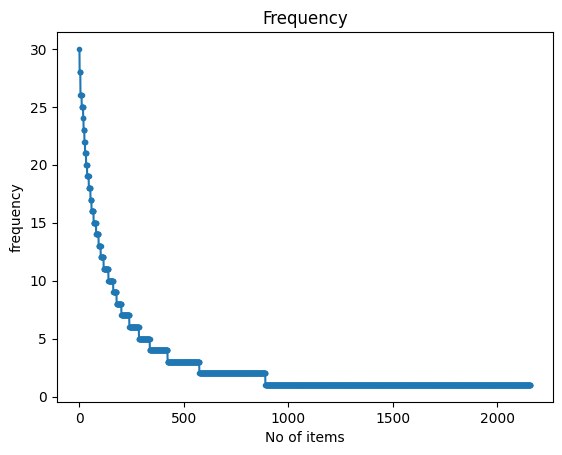

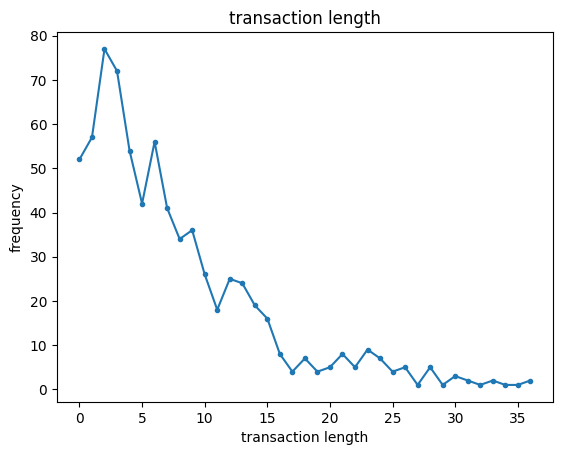

In [13]:
# Exercise 17 (part 2)
obj_0 = tds.TransactionalDatabase('td_freq_db_' + sentiments[0].replace('.', '_') + '.csv')
obj_0.run()
obj_0.printStats()
obj_0.plotGraphs()

obj_1 = tds.TransactionalDatabase('td_freq_db_' + sentiments[1].replace('.', '_') + '.csv')
obj_1.run()
obj_1.printStats()
obj_1.plotGraphs()

In [71]:
# Exercise 17 (part 3)
# I decrease the k here to match dataset features.
for k in range(250, 1000, 250):
    obj = fae.FAE(iFile='td_freq_db_' + sentiments[1].replace('.', '_') + '.csv', k=k)
    obj.mine()
    frequentPatternsDF = obj.getPatternsAsDataFrame()
    print(f'FAE Top-K with k = {k}')
    print('Total No of patterns: ' + str(len(frequentPatternsDF))) #print the total number of patterns
    print('Runtime: ' + str(obj.getRuntime())) #measure the runtime
    print(frequentPatternsDF)
    print('---------')

for minSup in range(3, 12, 3):
    obj = mfpg.MaxFPGrowth(iFile='td_freq_db_' + sentiments[1].replace('.', '_') + '.csv', minSup=minSup)
    obj.mine()
    frequentPatternsDF = obj.getPatternsAsDataFrame()
    print(f'MaxFPGrowth with minSup = {minSup}')
    print('Total No of patterns: ' + str(len(frequentPatternsDF))) #print the total number of patterns
    print('Runtime: ' + str(obj.getRuntime())) #measure the runtime
    print(frequentPatternsDF)
    print('---------')

 TopK frequent patterns were successfully generated using FAE algorithm.
FAE Top-K with k = 250
Total No of patterns: 250
Runtime: 0.04288291931152344
                Patterns  Support
0               favorite       30
1                   ever       28
2                  would       28
3                   will       28
4                     go       28
..                   ...      ...
245                60 50        7
246  yesterday more once        7
247       more yesterday        7
248            more once        7
249                liked        6

[250 rows x 2 columns]
---------
 TopK frequent patterns were successfully generated using FAE algorithm.
FAE Top-K with k = 500
Total No of patterns: 500
Runtime: 0.15458440780639648
       Patterns  Support
0      favorite       30
1          ever       28
2         would       28
3          will       28
4            go       28
..          ...      ...
495   don house        4
496   god bless        4
497  brenda lee        4
498   

In [27]:
# Exercise 18 (part 1)
# minSup choose this one by above graphs in Exercise 17 (part 2)
# We group together all of the dataframes related to our found patterns
dfs = []

for i,sentiment in enumerate(sentiments):
    obj = mfpg.MaxFPGrowth(iFile='td_freq_db_' + sentiment.replace('.', '_') + '.csv', minSup=6)
    obj.mine()
    dfs.append(obj.getPatternsAsDataFrame())

# Identify patterns that appear in more than one sentiment
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for pattern_df in dfs:
    for pattern in pattern_df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
total_patterns_count = sum(len(df) for pattern_df in dfs)
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each, filter the patterns to keep only the unique ones
filtered_dfs = []
for pattern_df in dfs:
    filtered_df = pattern_df[pattern_df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe and sort by support
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

print(final_pattern_df)
print(f"Number of patterns discarded: {discarded_patterns_count}")

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
      Patterns  Support
312      ever        28
311     would        28
310       kid        26
309      only        26
308      such        26
..         ...      ...
39      close         6
38       goes         6
37      guess         6
36       next         6
156  actually         6

[313 rows x 2 columns]
Number of patterns discarded: 2687


In [36]:
# Exercise 18 (part 2)

# Convert 'tcomment' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
df_tdm = count_vect.fit_transform(df['comment'])  # X['comment'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
df['tokenized_comment'] = df['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=df.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in tqdm(final_pattern_df['Patterns']):
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = df['tokenized_comment'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
# Concatenate the original TDM and the pattern matrix to augment the features
tdm_df = pd.DataFrame(df_tdm.toarray(), columns=terms, index=df.index)
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

100%|██████████| 313/313 [00:00<00:00, 358.67it/s]


,00,000,045,07,10,100,10m,11,11th,12,...,room,innocent,fast,funny,1973,close,goes,guess,next,actually
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
# Exercise 18 (part 3)
df_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
df_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
df_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

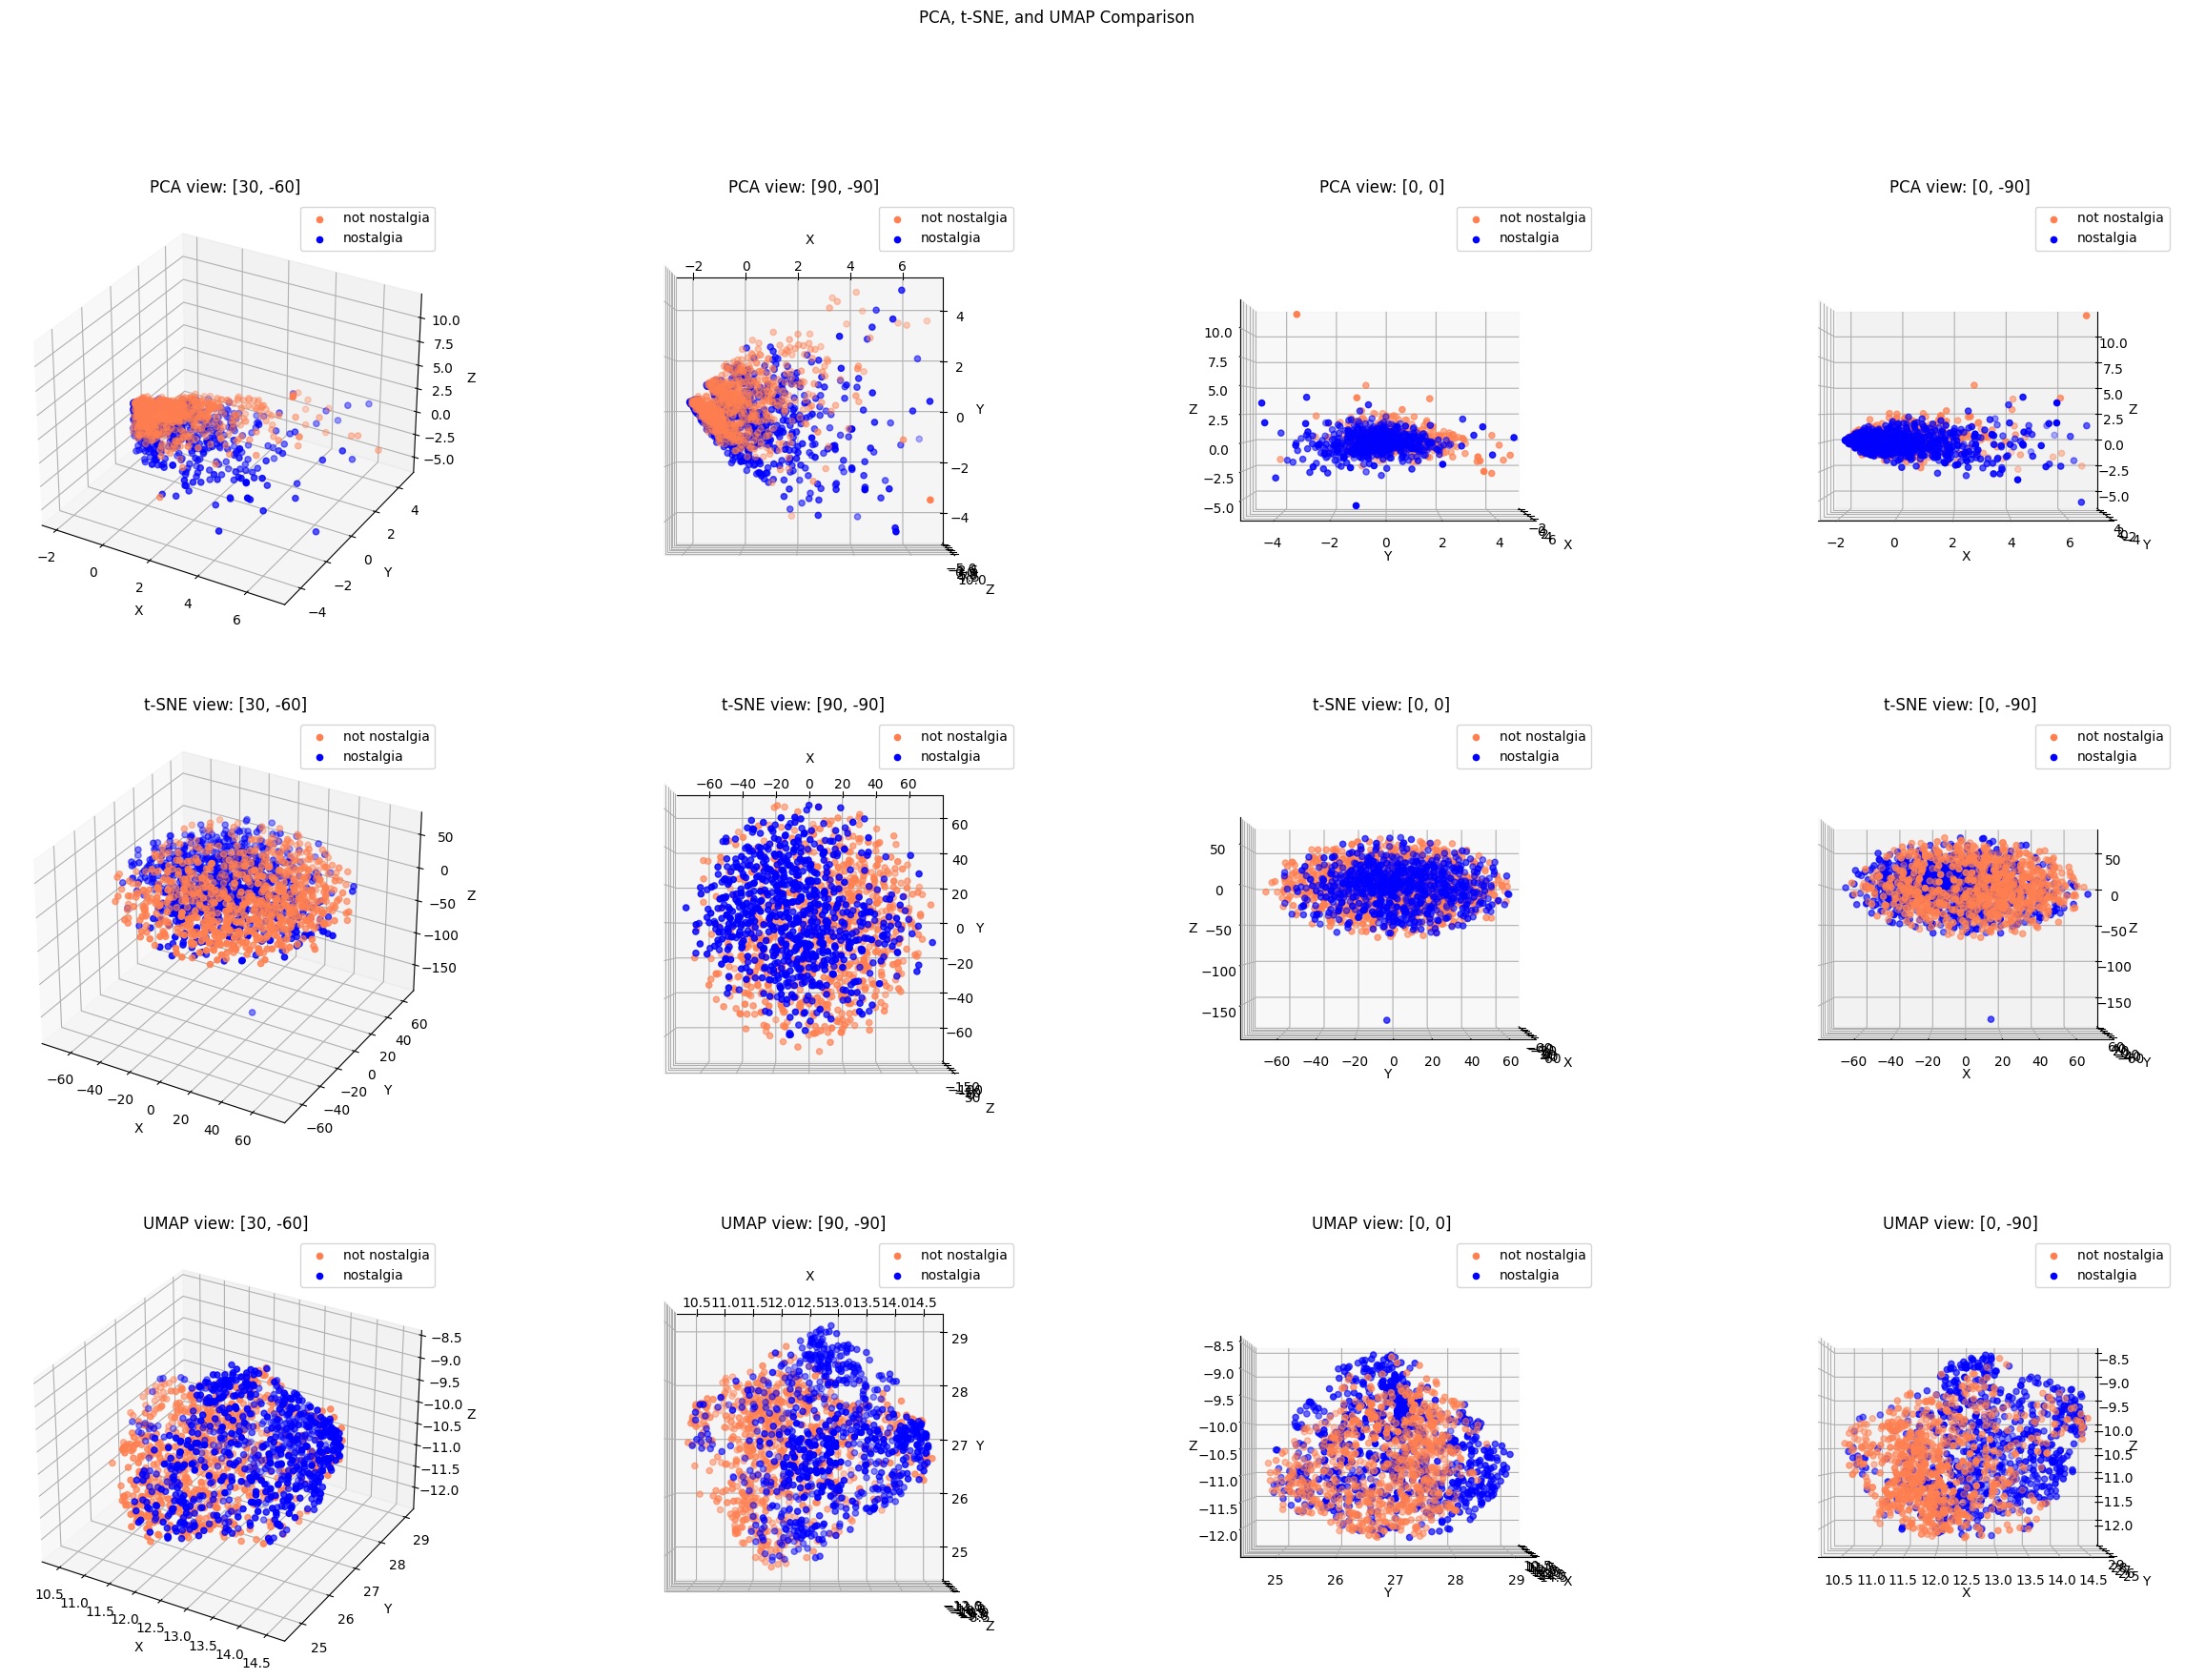

In [101]:
# Exercise 18 (part 4)

# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
sentiments = df['sentiment'].unique() 

fig, axes = plt.subplots(3, 4, figsize=(30, 20), subplot_kw={"projection": "3d"})
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title, view):
    for c, sentiment in zip(col, sentiments):
        xs = X_reduced[df['sentiment'] == sentiment].T[0]
        ys = X_reduced[df['sentiment'] == sentiment].T[1]
        zs = X_reduced[df['sentiment'] == sentiment].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=sentiment)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')
    ax.view_init(view[0], view[1])

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
method_names = ['PCA', 't-SNE', 'UMAP']
method_results = [df_pca_aug, df_tsne_aug, df_umap_aug]
view_angles = [[30, -60], [90, -90], [0, 0], [0, -90]]

for i in range(0, 3):
    for j in range(0, 4):
        plot_scatter(axes[i][j], method_results[i], 
            method_names[i] + ' view: ' + str(view_angles[j]), 
            view_angles[j])

plt.show()

In [103]:
# Exercise 19
mlb = preprocessing.LabelBinarizer()
mlb.fit(df.sentiment)
df['bin_sentiment'] = mlb.transform(df['sentiment']).tolist()
df[0:9]

,sentiment,comment,unigrams,tokenized_comment,bin_sentiment
0,not nostalgia,He was a singer with a golden voice that I lov...,"[He, was, a, singer, with, a, golden, voice, t...","{16years, Reeves, singer, golden, still, you, ...",[1]
1,nostalgia,The mist beautiful voice ever I listened to hi...,"[The, mist, beautiful, voice, ever, I, listene...","{singing, still, I, him, an, The, when, to, a,...",[0]
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,"[I, have, most, of, Mr., Reeves, songs, ., Alw...","{songs., no, Reeves, Mr., never, They, think, ...",[0]
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,"[30, day, leave, from, 1st, tour, in, Viet, Na...","{you, granted, some, the, pray, I, 2nd, tour, ...",[1]
4,nostalgia,listening to his songs reminds me of my mum wh...,"[listening, to, his, songs, reminds, me, of, m...","{his, everyday, of, reminds, who, to, mum, me,...",[0]
5,nostalgia,"Every time I heard this song as a child, I use...","[Every, time, I, heard, this, song, as, a, chi...","{Now, over, still, got, I, appreciate, Reeves,...",[0]
6,nostalgia,"My dad loved listening to Jim Reeves, when I w...","[My, dad, loved, listening, to, Jim, Reeves, ,...","{the, listening, I, Reeves,, then,, in, back, ...",[0]
7,nostalgia,i HAVE ALSO LISTENED TO Jim Reeves since child...,"[i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...","{am, feeling, Reeves, LISTENED, 71, puts, the,...",[0]
8,not nostalgia,Wherever you are you always in my heart,"[Wherever, you, are, you, always, in, my, heart]","{in, heart, Wherever, always, are, you, my}",[1]


## Instruction 3
#### Generate TFIDF features and implement two Bayes Classifiers with different features.

I first impelemnt Bayes classifier with Count vectorizer, and Tfidf features generation is implemented in the second part. It's more convenient to put them together in a code cell.

From documentation, MultinomialNB can also support fractions like TFIDF **in practice**. But for this dataset, the sentiment is only classified as "yes or no", so I apply BernoulliNB. BernoulliNB is designed for binary, which is suitable for this kind of dataset (Y = 1 or 0). 

In [39]:
# Implement Bayes Classifier
# First implement with count_vect

target_names = df.sentiment.unique().tolist()

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, df['sentiment'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8466666666666667

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.7977    0.9289    0.8583       225
    nostalgia     0.9149    0.7644    0.8329       225

     accuracy                         0.8467       450
    macro avg     0.8563    0.8467    0.8456       450
 weighted avg     0.8563    0.8467    0.8456       450



In [43]:
# Implement Bayes Classifier
# Now with tfidf_vect (part 1)

# Generate TFIDF features
tfidf_vect = TfidfVectorizer()
df_tdm = tfidf_vect.fit_transform(df.comment)
terms = tfidf_vect.get_feature_names_out()

# Tokenize the sentences into sets of unique words
df['tokenized_comment'] = df['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=df.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in tqdm(final_pattern_df['Patterns']):
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = df['tokenized_comment'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
# Concatenate the original TDM and the pattern matrix to augment the features
tdm_df = pd.DataFrame(df_tdm.toarray(), columns=terms, index=df.index)
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

100%|██████████| 313/313 [00:00<00:00, 364.93it/s]


,00,000,045,07,10,100,10m,11,11th,12,...,room,innocent,fast,funny,1973,close,goes,guess,next,actually
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# Implement Bayes Classifier
# Now with tfidf_vect (part 2)

target_names = df.sentiment.unique().tolist()

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, df['sentiment'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = BernoulliNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8844444444444445

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.8589    0.9200    0.8884       225
    nostalgia     0.9139    0.8489    0.8802       225

     accuracy                         0.8844       450
    macro avg     0.8864    0.8844    0.8843       450
 weighted avg     0.8864    0.8844    0.8843       450



## Instruction 4
#### What are the inefficiencies?

There are some parts that is very inefficient in Master notebook. For example, the process to produce augmented_df takes too much time, especially the code shown in the below code cell **(Originally provided in Section 5.4)**

I've used [tqdm module](https://tqdm.github.io/) to check how much time I need to finish this part of code, and it says roughly **16 to 24 hours** (57159 loops). My computer can run all the other parts of code in Master notebook within 3 minutes, so that part of code is definitely problematic, or it may be unsuitable for large datasets.

By tracing the code, I believe there are at least 2 reasons for the long running time.
1. We only discard non-unique patterns, and this is not enough. The pattern discarded is only 3% to 4%. We may need to discard more patterns or do some other process. (Or maybe I did it wrong)

2. X.tokenized_text is too large and makes **apply** and **issubset** method too long to execute. From my experiment results, tqdm shows I can run roughly 365 iterations per second in Homework notebook, while only 1.5 iterations per second in Master notebook, but I am running the same code. Although some applications running in background may consume the resources, but the differences between these are too significant to blame on this situation.

In [ ]:
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

Another example is the code in the below cell. The problem is not the execution time, but an error. I run into a error said "**UnicodeEncodeError: 'cp950' codec can't encode character '\xe9' in position 4: illegal multibyte sequence**"

I don't know whether this error is because of the recent change of PAMI or not. Neither do I know whether the latest change can solve this error or not. Fortunately, the result csv is provided so that I can continue working on Master notebook.

In [ ]:
from PAMI.extras.DF2DB import DenseFormatDF as db

for category in term_document_dfs:
    category_safe = category.replace('.', '_')
    obj = db.DenseFormatDF(term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)